## IST707 Final Course Project: Predicting US Permanent Visa Application Decisions using Machine Learning

### Instructor: Professor Ying Lin

### Submitted by: Aneesh Phatak, Sankalp Singh

### Date of Submission: 12/11/2020

## Problem Statement

#### The objective of our project is to design a machine learning based system that could help in predicting US visa application decisions based on various input features like employer name, class of admission, country of citizenship etc.

#### This system will be useful for the employers who actively file for visa applications for their international employees every year

#### We will also try to identify what are the most important factors that help in predicting if a certain application will be certified or denied

### Dataset Description

#### The US Permanent Visa Applications dataset has been collected and distributed by US Department of Labor. This dataset is available on Kaggle and contains a detailed information on 374k visa decisions between 2011-2016. The target variable consists of ‘Certified’ and ‘Denied’ decisions for each application. The dataset is highly imbalanced and consists of input features like employer name, employee education, class of admission etc.

#### Target attribute: case_status (0-Denied) and (1-Certified)

#### Some input features:
- case_number: contains the case number for the visa application                                      
- class_of_admission: contains the class of admission like H1-B, F1, J1, L1 etc                               
- country_of_citizenship: consists of country of citizenship of employees                            
- decision_date: consists of date on which visa decision was made                                                    - employer_city: contains employer city                                      
- employer_country: contains the employer country                                                           
- employer_name: contains the employer name                                     
- employer_num_employees: consists of total number of employees under an employer                           
- employer_phone: contains the employer phone number                                                                - employer_postal_code: contains the employer postal code 
- pw_soc_code: consists of the ocuupation code assoicated with the job                                              - pw_unit_of_pay_9089: consists of income associated with the job

### Import Libraries

- Importing all the required libraries that will help us perform data pre-processing, visualizations, modeling and performance evaluation.

In [2]:
# importing all the required libraries
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from pandas import DataFrame, Series
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,classification_report,recall_score,roc_curve,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import pickle
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
import random as rn
import os
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
rn.seed(12345)
from keras import backend as K
from collections import OrderedDict
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


### Read the dataset

- Here we are reading data set. We will be performing all the data pre-processing steps on the data set

- Later on, while modeling we will be splitting the dataset into training and validation to train our model and perform hyper parameter tuning using the performance on validation set.


In [2]:
# Reading training dataset
# The parse_dates parameter used will read both the columns mentioned in datetime64[ns] format
df = pd.read_csv('us_perm_visas.csv', 
                 low_memory = False, 
                 parse_dates=['decision_date', 'case_received_date'])

In [3]:
# check the shape of the dataset
df.shape

(374362, 154)

In [4]:
# displaying number of rows and columns
print('Total Visa Applications:', len(df))
print('Total Features:', len(df.columns))

Total Visa Applications: 374362
Total Features: 154


In [5]:
# the following lines will ensure that output is not truncated.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
# check the data types for all features
df.dtypes

add_these_pw_job_title_9089                       object
agent_city                                        object
agent_firm_name                                   object
agent_state                                       object
application_type                                  object
case_no                                           object
case_number                                       object
case_received_date                        datetime64[ns]
case_status                                       object
class_of_admission                                object
country_of_citizenship                            object
country_of_citzenship                             object
decision_date                             datetime64[ns]
employer_address_1                                object
employer_address_2                                object
employer_city                                     object
employer_country                                  object
employer_decl_info_title       

In [7]:
# displaying 5 first rows
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,employer_city,employer_country,employer_decl_info_title,employer_name,employer_num_employees,employer_phone,employer_phone_ext,employer_postal_code,employer_state,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,foreign_worker_info_education_other,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_postal_code,foreign_worker_info_rel_occup_exp,foreign_worker_info_req_experience,foreign_worker_info_state,foreign_worker_info_training_comp,foreign_worker_ownership_interest,foreign_worker_yr_rel_edu_completed,fw_info_alt_edu_experience,fw_info_birth_country,fw_info_education_other,fw_info_postal_code,fw_info_rel_occup_exp,fw_info_req_experience,fw_info_training_comp,fw_info_yr_rel_edu_completed,fw_ownership_interest,ji_foreign_worker_live_on_premises,ji_fw_live_on_premises,ji_live_in_dom_svc_contract,ji_live_in_domestic_service,ji_offered_to_sec_j_foreign_worker,ji_offered_to_sec_j_fw,job_info_alt_cmb_ed_oth_yrs,job_info_alt_combo_ed,job_info_alt_combo_ed_exp,job_info_alt_combo_ed_other,job_info_alt_field,job_info_alt_field_name,job_info_alt_occ,job_info_alt_occ_job_title,job_info_alt_occ_num_months,job_info_combo_occupation,job_info_education,job_info_education_other,job_info_experience,job_info_experience_num_months,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_req_normal,job_info_job_title,job_info_major,job_info_training,job_info_training_field,job_info_training_num_months,job_info_work_city,job_info_work_postal_code,job_info_work_state,naics_2007_us_code,naics_2007_us_title,naics_code,naics_title,naics_us_code,naics_us_code_2007,naics_us_title,naics_us_title_2007,orig_case_no,orig_file_date,preparer_info_emp_completed,preparer_info_title,pw_amount_9089,pw_determ_date,pw_expire_date,pw_job_title_908,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_source_name_other_9089,pw_track_num,pw_unit_of_pay_9089,rec_info_barg_rep_notified,recr_info_barg_rep_notified,recr_info_coll_teach_comp_proc,recr_info_coll_univ_teacher,recr_info_employer_rec_payment,recr_info_first_ad_start,recr_info_job_fair_from,recr_info_job_fair_to,recr_info_on_campus_recr_from,recr_info_on_campus_recr_to,recr_info_pro_org_advert_from,recr_info_pro_org_advert_to,recr_info_prof_org_advert_from,recr_info_prof_org_advert_to,recr_info_professional_occ,recr_info_radio_tv_ad_from,recr_info_radio_tv_ad_to,recr_info_second_ad_start,recr_info_sunday_newspaper,recr_info_swa_job_order_end,recr_info_swa_job_order_start,refile,ri_1st_ad_newspaper_name,ri_2nd_ad_newspaper_name,ri_2nd_ad_newspaper_or_journal,ri_campus_placement_from,ri_campus_placement_to,ri_coll_tch_basic_process,ri_coll_teach_pro_jnl,ri_coll_teach_select_date,ri_employee_referral_prog_from,ri_employee_referral_prog_to,ri_employer_web_post_from,ri_employer_web_post_to,ri_job_search_website_from,ri_job_search_website_to,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,NEW YORK,NaN,NaN,NETSOFT USA INC.,NaN,NaN,NaN,10010.0,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,NY,541512,Computer Systems Design Services,

In [8]:
# Check total null values present for all attributes in data
df.isnull().sum()

add_these_pw_job_title_9089               332168
agent_city                                162908
agent_firm_name                           167365
agent_state                               166123
application_type                          239093
case_no                                   239093
case_number                               135269
case_received_date                        135271
case_status                                    0
class_of_admission                         22845
country_of_citizenship                     20633
country_of_citzenship                     353788
decision_date                                  0
employer_address_1                            42
employer_address_2                        149193
employer_city                                 14
employer_country                          135343
employer_decl_info_title                  135308
employer_name                                 12
employer_num_employees                    135349
employer_phone      

## Data Pre-Processing and EDA

- Here, we have followed the CRISP-DM methodology which consists of following steps in the mentioned order: Business & Data Understanding -> Data cleaning & Pre-processing -> Modeling -> Performance Evaluation -> Deployment
- We have performed the below data pre-processing techniques:

1) Data Transformations

2) Exploratory Data Analysis

3) Feature Selection

4) Handling NaN values

5) Feature engineering: Under sampling & Label encoding

6) Normalization and Scaling

### 1) Data Transformations

- We have merged ‘case_number’ and ‘case_no’ features into a single feature ‘casenumber’ as both of these features consisted of similar values. We have then removed the 'case_number' and 'case_no' features

- We have transformed the target attribute 'case_status' into a binary output label by merging all the observations for 'Certified-Expired' and 'Certified' case status and removing all the 'Withdrawn' case status. Our final dataframe consists of 'case_status' with binary label - 'Certified' and 'Denied'. We have replaced the value in target attribute - 0 for 'Denied' and 1 for 'Certified' later on for machine learning purpose

- We have created a new feature ‘year’ from the ‘decision_date’ attribute and dropped the 'decision_date' column

In [9]:
# print null values for case_number and case_no attributes
print('Null values in case_number:',df['case_number'].isnull().sum())
print('Null values in case_no:',df['case_no'].isnull().sum())

Null values in case_number: 135269
Null values in case_no: 239093


In [10]:
# merging the two attributes into a single feature - casenumber
casenumber_list1 = df['case_number'].tolist()
casenumber_list2 = df['case_no'].tolist()
casenumber_list3 = casenumber_list1 + casenumber_list2
casenumber = [x for x in casenumber_list3 if str(x) != 'nan']
df['casenumber'] = casenumber

In [11]:
# remove the initial two attributes
del df['case_number']
del df['case_no']

In [13]:
# check the count of values for target attribute before transformation
df['case_status'].value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: case_status, dtype: int64

In [14]:
# removing all withdrawn applications
df = df.loc[df['case_status']!='Withdrawn']

In [15]:
# combining certified-expired and certified applications into one type i.e. 'certified'
df['case_status'] = df['case_status'].replace(['Certified-Expired'], 'Certified')

In [16]:
# creating new feature 'year' by extracting year from 'decision_date'
df['year'] = df['decision_date'].dt.year


In [17]:
# check the count of values for target attribute after transformation
df['case_status'].value_counts()

Certified    330519
Denied        25649
Name: case_status, dtype: int64

In [ ]:
# transforming values present in the target attribute - 0 for Denied and 1 for Certified
df['case_status'] = df['case_status'].map(dict(Certified=1, Denied=0))

### 2) Exploratory Data Analysis

#### The first plot represents the total visa applications for each year. We can see from the below plot that the total visa applications that are certified have been increasing in the 5-year span. The denied visa applications count remains almost constant from 2011 to 2016

Text(0.5, 1.0, 'Plot of Total Visa Applications vs Year')

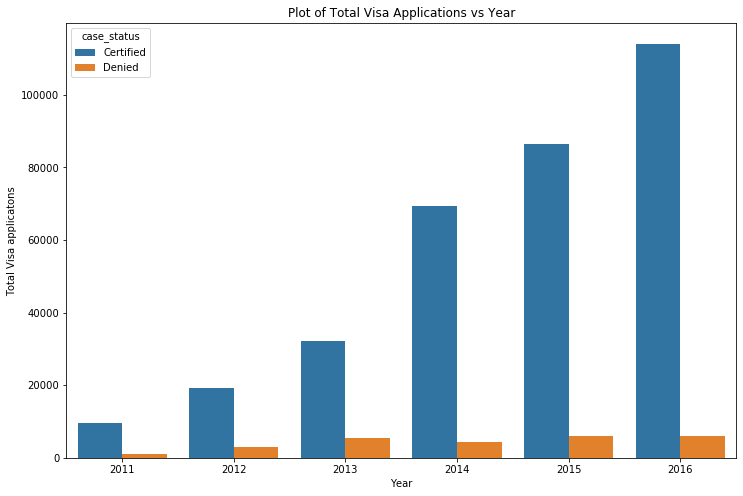

In [18]:
# number of Visa applicatons per year
plt.figure(figsize=(12,8))
sns.countplot(x="year", hue="case_status", data=df)
plt.xlabel('Year')
plt.ylabel('Total Visa applicatons')
plt.title("Plot of Total Visa Applications vs Year")

In [19]:
# displaying 10 most popular cities
df['employer_city'].value_counts().head(10)

NEW YORK           15992
COLLEGE STATION    11983
SANTA CLARA        10446
SAN JOSE            9004
REDMOND             8469
MOUNTAIN VIEW       8023
HOUSTON             6128
SUNNYVALE           6050
SAN FRANCISCO       5951
PLANO               5491
Name: employer_city, dtype: int64

#### This plot shows the distribution of number of visa applications for each year for top 10 popular cities. We can see that some of the most popular cities that file for applications in the US are New York, College Station, Mountain View, Houston, San Francisco

Text(0.5, 1.0, 'Plot of Total Visa Applications for each Year vs Top 10 Employer Cities')

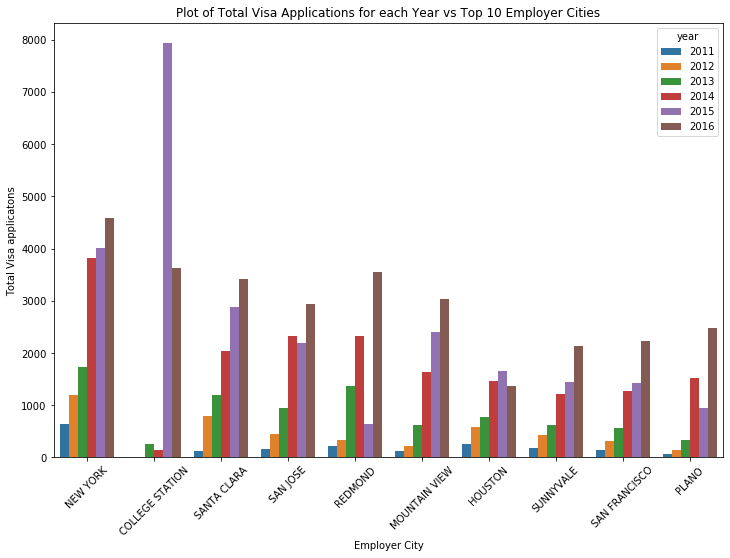

In [20]:
# number of visa applications per year in top 10 popular cities
plt.figure(figsize=(12,8))
sns.countplot(x='employer_city', hue='year', data=df, order=df['employer_city'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.xlabel('Employer City')
plt.ylabel('Total Visa applicatons')
plt.title("Plot of Total Visa Applications for each Year vs Top 10 Employer Cities")

In [21]:
# displaying 10 most popular employers
df['employer_name'].value_counts().head(10)

COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION    11936
MICROSOFT CORPORATION                             8082
INTEL CORPORATION                                 6120
GOOGLE INC.                                       5060
AMAZON CORPORATE LLC                              3639
CISCO SYSTEMS, INC.                               2592
APPLE INC.                                        2536
ORACLE AMERICA, INC.                              2505
INFOSYS LTD.                                      2498
DELOITTE CONSULTING LLP                           1689
Name: employer_name, dtype: int64

#### This plot shows distribution of number of visa applications w.r.t. top 10 popular employers. Cognizant, Microsoft, Intel, Google and Amazon are the top 5 employers that file for most visa applications

Text(0.5, 1.0, 'Plot of Total Visa Applications vs Top 10 Most Popular Employers')

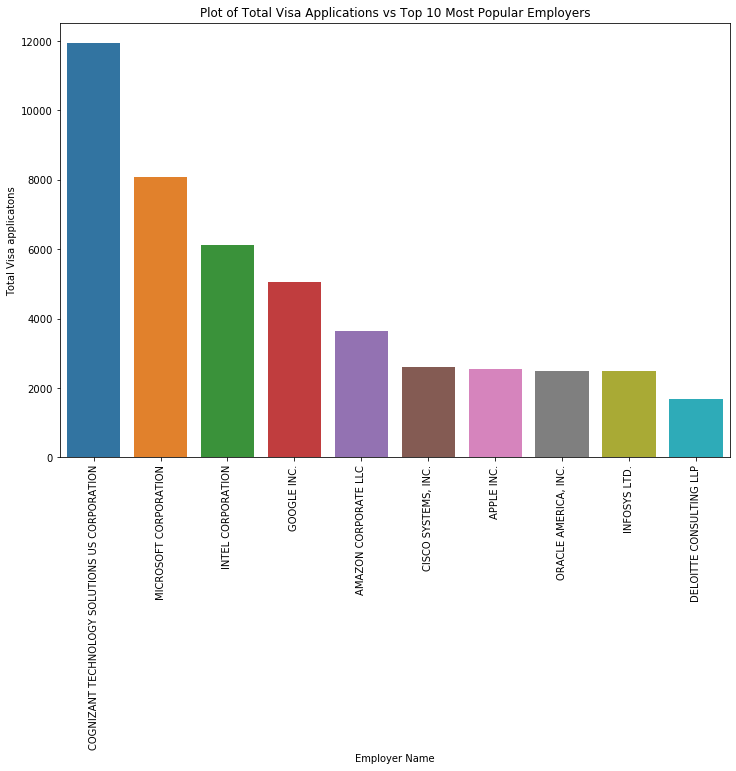

In [22]:
# checking distribution of number of visa applications w.r.t. top 10 popular employers
plt.figure(figsize=(12,8))
sns.countplot(x='employer_name', data=df, order=df['employer_name'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.xlabel('Employer Name')
plt.ylabel('Total Visa applicatons')
plt.title("Plot of Total Visa Applications vs Top 10 Most Popular Employers")

In [23]:
# Checking distribution of number of visa applications w.r.t. 10 most popular job titles
df['job_info_job_title'].value_counts().head(10)

Software Engineer                   14372
Computer Systems Analyst - V         4747
Senior Software Engineer             3801
Computer Systems Analyst - II        3416
Software Developer                   2880
Assistant Professor                  2604
Programmer Analyst                   2534
Computer Systems Analyst - IV        2496
Systems Analyst                      2034
Software Development Engineer II     1630
Name: job_info_job_title, dtype: int64

#### The below plot shows the distribution of number of visa applications w.r.t. 10 most popular job titles. We can see from the below plot that most of the job titles are related to the Information Technology industry

Text(0.5, 1.0, 'Plot of Total Visa Applications vs Top 10 Most Popular Jobs')

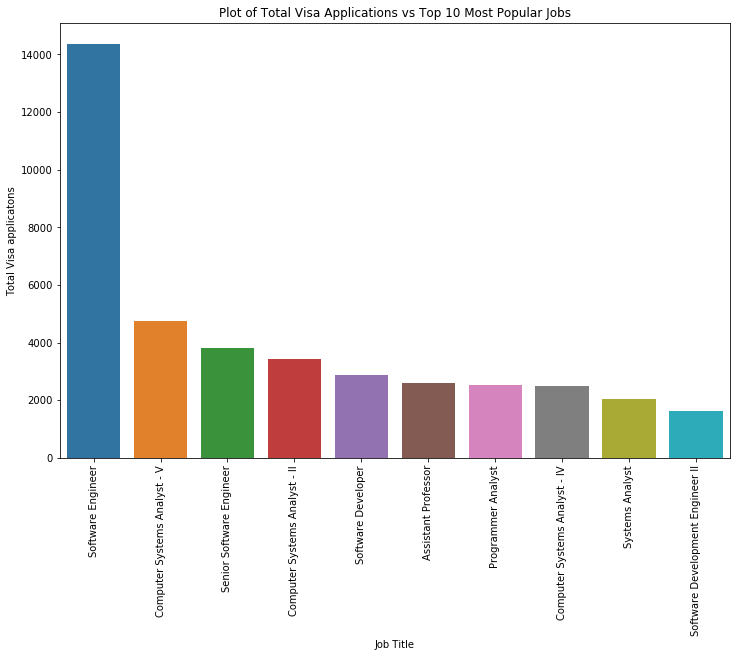

In [24]:
# plotting visa application count vs 10 most popular jobs
plt.figure(figsize=(12,8))
sns.countplot(x='job_info_job_title', data=df, order=df['job_info_job_title'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Total Visa applicatons')
plt.title("Plot of Total Visa Applications vs Top 10 Most Popular Jobs")

In [25]:
# Checking distribution of number of visa applications w.r.t. country_of_citizenship
df['country_of_citizenship'].value_counts().head(10)

INDIA             186777
CHINA              26418
SOUTH KOREA        21218
CANADA             13129
MEXICO              7917
PHILIPPINES         7485
UNITED KINGDOM      4414
TAIWAN              3690
PAKISTAN            3507
FRANCE              2871
Name: country_of_citizenship, dtype: int64

#### Below distribution is a plot of number of visa applications w.r.t. country of citizenship. We can see that most of the employees filing applications are from India, China, South Korea, Canada and Mexico

Text(0.5, 1.0, 'Plot of Total Visa Applications vs Top 10 Most Popular Country of Citizenship')

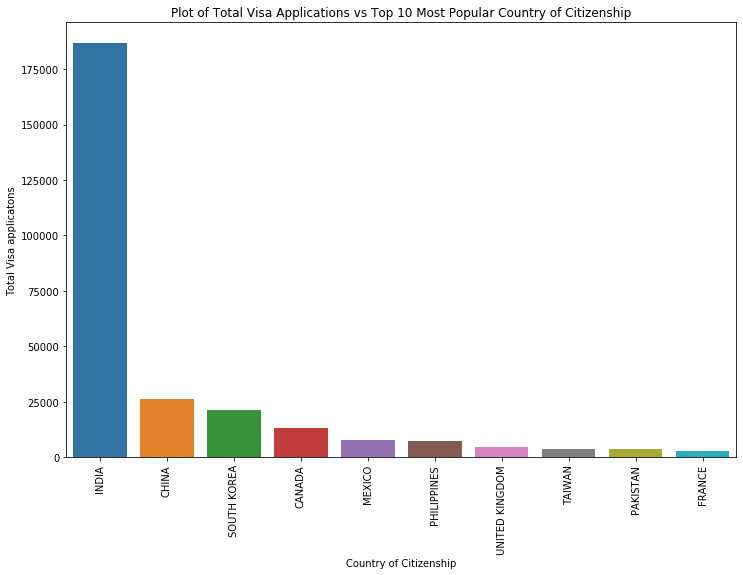

In [26]:
# plot of number of visa applications w.r.t. country_of_citizenship
plt.figure(figsize=(12,8))
sns.countplot(x='country_of_citizenship', data=df, order=df['country_of_citizenship'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.xlabel('Country of Citizenship')
plt.ylabel('Total Visa applicatons')
plt.title("Plot of Total Visa Applications vs Top 10 Most Popular Country of Citizenship")

In [27]:
# Checking distribution of number of visa applications w.r.t. class_of_admission
df['class_of_admission'].value_counts().head(10)

H-1B          270467
L-1            19301
F-1            13994
Not in USA      7713
TN              4069
E-2             3941
B-2             3164
Parolee         2503
EWI             1878
J-1              905
Name: class_of_admission, dtype: int64

#### Below plot shows the distribution of number of visa applications w.r.t. type of visa. We can infer that most of the visa pplications are for H1-B, L1 and F1 class of admissions

Text(0.5, 1.0, 'Plot of Total Visa Applications vs Top 10 Most Popular Class of Admission')

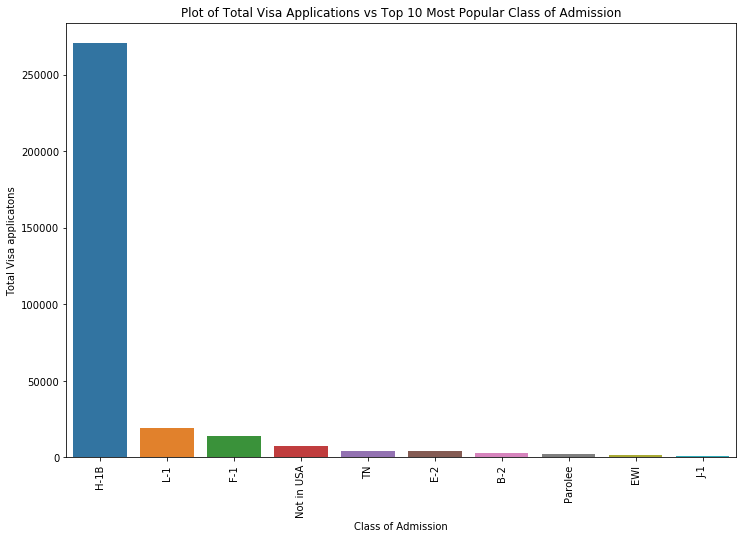

In [28]:
# plot of number of visa applications w.r.t. class_of_admission
plt.figure(figsize=(12,8))
sns.countplot(x='class_of_admission', data=df, order=df['class_of_admission'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.xlabel('Class of Admission')
plt.ylabel('Total Visa applicatons')
plt.title("Plot of Total Visa Applications vs Top 10 Most Popular Class of Admission")

In [29]:
# Checking distribution of number of visa applications w.r.t. application_type
df['application_type'].value_counts()

ONLINE      105616
PERM         19219
MAILEDIN      2013
Name: application_type, dtype: int64

#### Below distribution represents number of visa applications w.r.t. Mode of application. We can see that most of the applications are filed using the online mode

Text(0.5, 1.0, 'Plot of Total Visa Applications vs Application Type')

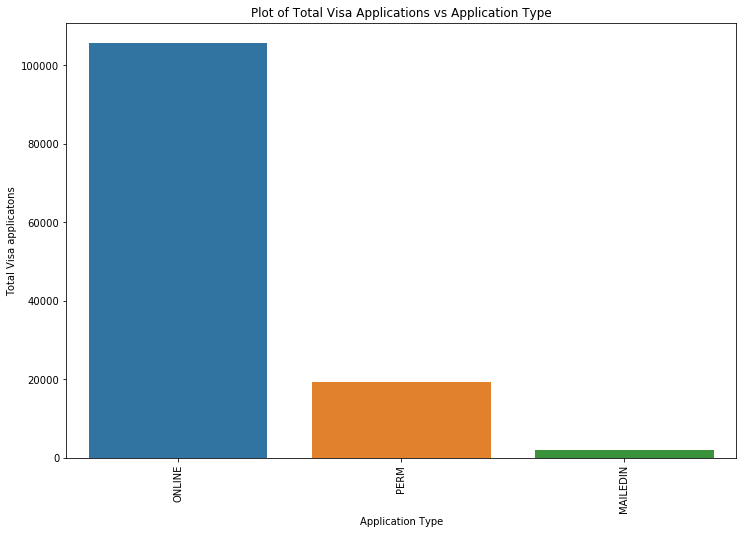

In [30]:
# plot of number of visa applications w.r.t. application_type
plt.figure(figsize=(12,8))
sns.countplot(x='application_type', data=df, order=df['application_type'].value_counts().iloc[:3].index)
plt.xticks(rotation=90)
plt.xlabel('Application Type')
plt.ylabel('Total Visa applicatons')
plt.title("Plot of Total Visa Applications vs Application Type")

In [31]:
# Checking distribution of number of visa applications w.r.t. foreign_worker_info_education
df['foreign_worker_info_education'].value_counts()

Master's       99892
Bachelor's     84674
None           16667
Doctorate      11759
Other           9807
High School     4257
Associate's     2225
Name: foreign_worker_info_education, dtype: int64

#### Plot of number of visa applications w.r.t. education level. Below plot represents that most of the employees filing for visa applications have obtained master's and bachelor's degree

Text(0.5, 1.0, 'Plot of Total Visa Applications vs Education Level')

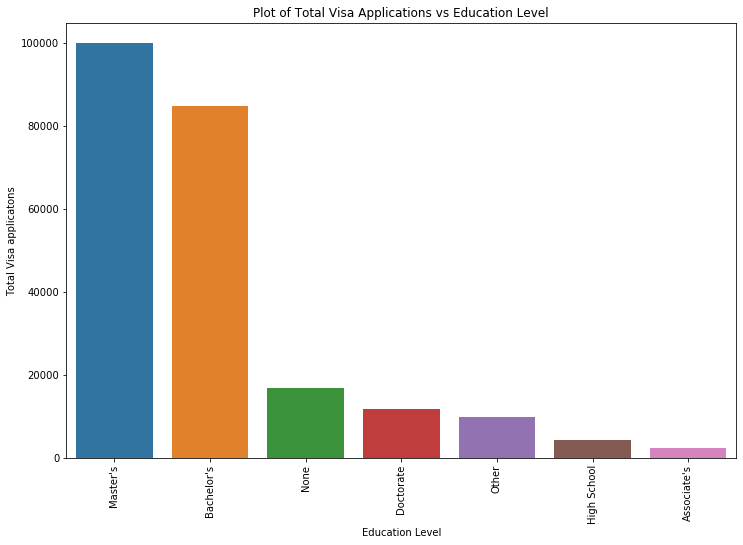

In [32]:
# plot of number of visa applications w.r.t. foreign_worker_info_education
plt.figure(figsize=(12,8))
sns.countplot(x='foreign_worker_info_education', data=df, order=df['foreign_worker_info_education'].value_counts().iloc[:7].index)
plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.ylabel('Total Visa applicatons')
plt.title("Plot of Total Visa Applications vs Education Level")

### 3) Feature Selection

- For feature selection, as our original dataset consisted of 154 columns, we have dropped all the columns consisting more than 20% missing values as imputing such a large portion of our dataset would be impractical

In [33]:
# Check for % of missing values in training data
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

add_these_pw_job_title_9089               89.011646
agent_city                                43.084163
agent_firm_name                           44.261697
agent_state                               43.952292
application_type                          64.385346
case_received_date                        35.614654
case_status                                0.000000
class_of_admission                         5.919959
country_of_citizenship                     5.410930
country_of_citzenship                     94.604512
decision_date                              0.000000
employer_address_1                         0.010388
employer_address_2                        39.595359
employer_city                              0.002808
employer_country                          35.634869
employer_decl_info_title                  35.625042
employer_name                              0.002246
employer_num_employees                    35.636273
employer_phone                            35.624481
employer_pho

In [34]:
# check shape before feature selection
df.shape

(356168, 154)

In [35]:
# keeping those columns which have more than 284934 non-missing observations or 80% non missing values
df = df.loc[:,df.count() >= 284934]

In [36]:
# check shape after feature selection
df.shape

(356168, 19)

### 4) Handling NaN values

- We have imputed all the missing values in our remaining attributes with their respective mode values as most of the missing features are categorical

-  We have also removed the irrelevant attributes after performing the imputations

In [37]:
# check for null values in the remaining attributes
df.isnull().sum()

case_status                   0
class_of_admission        21085
country_of_citizenship    19272
decision_date                 0
employer_address_1           37
employer_city                10
employer_name                 8
employer_postal_code         33
employer_state               37
job_info_work_city           95
job_info_work_state          96
pw_amount_9089             2203
pw_level_9089             26585
pw_soc_code                 390
pw_soc_title               2321
pw_source_name_9089        2087
pw_unit_of_pay_9089        1481
casenumber                    0
year                          0
dtype: int64

In [ ]:
# imputing all attributes using the respective mode values
df['class_of_admission'] = df['class_of_admission'].fillna(df['class_of_admission'].mode()[0])
df['country_of_citizenship']=df['country_of_citizenship'].fillna((df['country_of_citizenship'].mode()[0]))
df['employer_city']=df['employer_city'].fillna((df['employer_city'].mode()[0]))
df['employer_name']=df['employer_name'].fillna((df['employer_name'].mode()[0]))
df['employer_postal_code']=df['employer_postal_code'].fillna((df['employer_postal_code'].mode()[0]))
df['employer_state'] = df['employer_state'].fillna(df['employer_state'].mode()[0])
df['pw_amount_9089'] = df['pw_amount_9089'].fillna(df['pw_amount_9089'].mode()[0])
df['pw_level_9089'] = df['pw_level_9089'].fillna(df['pw_level_9089'].mode()[0])
df['pw_soc_code'] = df['pw_soc_code'].fillna(df['pw_soc_code'].mode()[0])
df['pw_soc_title'] = df['pw_soc_title'].fillna(df['pw_soc_title'].mode()[0])
df['pw_source_name_9089'] = df['pw_source_name_9089'].fillna(df['pw_source_name_9089'].mode()[0])
df['pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].fillna(df['pw_unit_of_pay_9089'].mode()[0])

# removing address as it has not significance in predicting decisions
del df['employer_address_1']

# removing below two attributes as we already have employer city and state
del df['job_info_work_city']
del df['job_info_work_state']

# removing decision date attribute as we already have year attribute 
del df['decision_date']

In [49]:
# check for null values after final imputations
df.isnull().sum()

case_status               0
class_of_admission        0
country_of_citizenship    0
employer_city             0
employer_name             0
employer_postal_code      0
employer_state            0
pw_amount_9089            0
pw_level_9089             0
pw_soc_code               0
pw_soc_title              0
pw_source_name_9089       0
pw_unit_of_pay_9089       0
casenumber                0
year                      0
dtype: int64

### 5) Feature Engineering: Under sampling technique to tackle imbalanced target attribute 

- Our initial dataset was highly imbalanced with respect to the target attribute

- To tackle the imbalanced dataset problem, we have leveraged the under-sampling technique. We have brought down the count of overrepresented classes to match the count of underrepresented classes using a random sample which has been extracted from the original dataset

- Our final under sampled dataset contains 50000 observations and 15 features

Text(0.5, 1.0, 'Distribution of Visa status for our dataset')

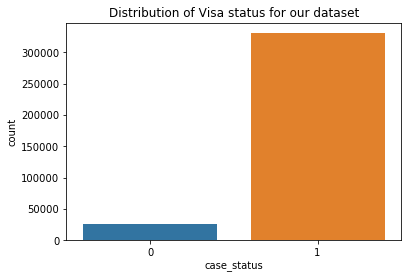

In [52]:
# Countplot to check the distribution of labels in attribute - 'Disease' before performing under sampling
sns.countplot(x="case_status", data=df).set_title('Distribution of Visa status for our dataset')

In [53]:
# checking value counts for target attribute before under sampling
df['case_status'].value_counts()

1    330519
0     25649
Name: case_status, dtype: int64

In [54]:
# implementing under sampling on target attribute
sample_df = df.groupby('case_status').apply(lambda x: x.sample(n=25000)).reset_index(drop = True)

In [55]:
# checking value counts for target attribute after under sampling
sample_df['case_status'].value_counts()

1    25000
0    25000
Name: case_status, dtype: int64

Text(0.5, 1.0, 'Distribution of Visa status for our sampled dataset')

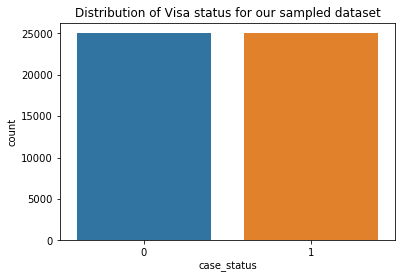

In [56]:
# Countplot to check the distribution of labels in attribute - 'Disease' after performing under sampling
sns.countplot(x="case_status", data=sample_df).set_title('Distribution of Visa status for our sampled dataset')

In [57]:
# checking shape for final sampled dataset
sample_df.shape

(50000, 15)

### 5) Feature Engineering: Label Encoding

- We have label encoded all the categorical features in order to feed them to the machine learning models

In [58]:
# label encoding the sampled dataset
sample_df = sample_df.apply(LabelEncoder().fit_transform)

In [60]:
# printing final datatset head after label encoding
sample_df.head()

,case_status,class_of_admission,country_of_citizenship,employer_city,employer_name,employer_postal_code,employer_state,pw_amount_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,casenumber,year
0,0,17,71,2545,8010,3579,92,13531,3,152,695,4,4,6195,5
1,0,28,162,3507,20460,376,12,2535,2,18,286,3,4,28341,1
2,0,32,167,3965,18001,5312,59,49,0,1015,470,3,1,7364,5
3,0,32,71,103,10690,2190,100,6320,0,97,1,3,4,345,3
4,0,3,34,2592,12406,4923,9,10736,1,152,695,3,4,34095,2


## Model Building

- Here, we have performed some pre-processing steps required for all of our machine learning models

- Firstly, we have performed a train-validation split on our training dataset using 70-30 as the size. This will help prevent our models from overfitting and we will also be able to perform hyper-parameter tuning on validation set

- Secondly, we have used the StandardScalar technique to scale our dataset. This is an important technique which can help us improve the perfomance of our models. We have scaled the train data, validation data and the test data as well. Scaling the dataset in an important step for models that use distance-based techniques for prediction

- Thirdly, we have created a generic AUC-ROC function which will help us generate the Area Under the Receiver Operating Characrteristic curve for all the models that can predict the probability of the target class labels

## Evaluation Metric: F1 Score

- The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall

- In our visa prediction problem, both false negatives and false positives may have dangerous consequences and hence we have decided to go ahead with f1-score as the most important metric to evaluate our models

In [61]:
# Define X & y for the split
X = sample_df.drop('case_status', axis=1)
y = sample_df['case_status']

In [62]:
# 70-30 train-validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

### 6) Normalization and Scaling

- For the final data preprocessing step, we have normalized and scaled all the input features using the standard scalar technique so that each feature contributes to the target attribute

In [63]:
# initializing the standard scalar
scaler=StandardScaler()

In [65]:
# scaling features in train set
X_train[['class_of_admission', 'country_of_citizenship', 'employer_city', 'employer_name', 
         'employer_postal_code', 'employer_state', 'pw_amount_9089', 'pw_level_9089', 
         'pw_soc_code', 'pw_soc_title', 'pw_source_name_9089', 'pw_unit_of_pay_9089', 
         'casenumber', 'year']] = scaler.fit_transform(X_train[['class_of_admission', 'country_of_citizenship', 
                                                                'employer_city', 'employer_name', 
                                                                'employer_postal_code', 'employer_state', 
                                                                'pw_amount_9089', 'pw_level_9089', 
                                                                'pw_soc_code', 'pw_soc_title', 
                                                                'pw_source_name_9089', 
                                                                'pw_unit_of_pay_9089', 
                                                                'casenumber', 'year']])

/Users/sankalpsingh/Vicky/Softwares/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sankalpsingh/Vicky/Softwares/Anaconda/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
# scaling features in test set
X_test[['class_of_admission', 'country_of_citizenship', 'employer_city', 'employer_name', 
         'employer_postal_code', 'employer_state', 'pw_amount_9089', 'pw_level_9089', 
         'pw_soc_code', 'pw_soc_title', 'pw_source_name_9089', 'pw_unit_of_pay_9089', 
         'casenumber', 'year']] = scaler.fit_transform(X_test[['class_of_admission', 'country_of_citizenship', 
                                                                'employer_city', 'employer_name', 
                                                                'employer_postal_code', 'employer_state', 
                                                                'pw_amount_9089', 'pw_level_9089', 
                                                                'pw_soc_code', 'pw_soc_title', 
                                                                'pw_source_name_9089', 
                                                                'pw_unit_of_pay_9089', 
                                                                'casenumber', 'year']])

/Users/sankalpsingh/Vicky/Softwares/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sankalpsingh/Vicky/Softwares/Anaconda/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [67]:
# check value count for output binary labels present in test set
y_test.value_counts()

0    7540
1    7460
Name: case_status, dtype: int64

#### ROC function - generic AUC-ROC function which will help us generate the Area Under the Receiver Operating Characteristic curve for all the models that can predict the probability of the target class labels

In [68]:
# define ROC AUC curve function
def ROC_AUC_curve(model,model_name="Model"):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Model: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.figure(figsize=(8,4))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

#### ROC function - generic AUC-ROC upgraded function which will help us generate the Area Under the Receiver Operating Characteristic curve for ANN models that can predict the probability of the target class labels

In [69]:
# Function to plot ROC_AUC_curve

def ROC_AUC_curve_upgraded(model,model_name="Model"):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.figure(figsize=(8,4))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

### Logistic Regression

- We have implemented the Logistic Regression classifier model here

- We have used a 3 folds cross validation grid search to perform the hyper-parameter tuning 

- After this, we have printed the classification report for our model on training data and testing data in order to get a sense of how well our model is performing in terms of precision, recall, f1-score and accuracy and to see if our model is overfitting on the training data

- We have also generated an AUC-ROC curve for the Logistic Regression model

In [163]:
# initializing the LR model
lr=LogisticRegression(random_state=16,solver="liblinear")

#### Hyper-paramater tuning using GridSearch:

- C: This is the cost parameter. It is the inverse of the lambda. Smaller value specify more regularization

- Penalty: The types of penalty that can be used are l1 and l2. The l1 penalty has the characteristics of eliminating features by making its co-efficient 0. The l2 penalty does not eliminate features but it penalizes the effect of less useful features and makes their co-efficient close to 0

In [164]:
# Performing grid search to find the best hyper-parameters
param_grid_lr = {
              'C': [.001,.005,.01,0.1,0.3,0.5,1,3,5,10],
              'penalty': ['l1', 'l2']
              }

In [181]:
# Using 3 fold cross validation and evaluation metric as Recall
grid_lr = GridSearchCV(lr, param_grid_lr, scoring='recall', cv=3, n_jobs=-1, verbose=1)

In [182]:
# Fitting LR model
lr_model = grid_lr.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished


In [183]:
# printing best hyper-parameters for model
lr_best_params = grid_lr.best_params_
print(lr_best_params)

{'C': 0.005, 'penalty': 'l1'}


In [184]:
# Printing classification report for predictions made by model on training dataset
print(classification_report(lr_model.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.61      0.67      0.63     15920
           1       0.70      0.64      0.67     19080

    accuracy                           0.65     35000
   macro avg       0.65      0.65      0.65     35000
weighted avg       0.66      0.65      0.65     35000



In [185]:
# Printing classification report for predictions made by model on validation dataset
print(classification_report(lr_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      6875
           1       0.70      0.64      0.67      8125

    accuracy                           0.66     15000
   macro avg       0.66      0.66      0.66     15000
weighted avg       0.66      0.66      0.66     15000



#### Generating the AUC-ROC curve for the LR model

- The AUC-ROC score that we get from the graph that we have plotted below tells us that our model is able to distinguish between the visa applications, if they will be certified or denied, 71.3% of the time

- The score is above 50% which means that the model is not just randomly predicting the probability of an application being certified or denied

No Skill: ROC AUC=0.500
Model: ROC AUC=0.713


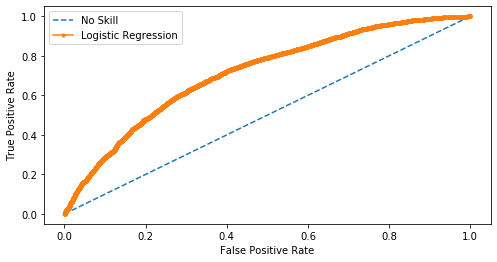

In [186]:
# plot AUC curve 
ROC_AUC_curve(model=lr_model,model_name="Logistic Regression")

#### Coefficients for Logistic Regression Model

- As we have used the l1 regularization paramater, we can see that the coefficient for the features 'employer_city' and 'employer_name' has been reduced to zero as part of the l1 penalty

- We can also conclude that 'year' has the highest coefficient indicating that 'year' increases the odds of visa application being certified the most

- Similarly, we can conclude that 'pw_soc_code' - increases the odds of visa application being certified the least

In [187]:
# printing the coefficients of LR model
lr_coefficients=OrderedDict(sorted(zip(X.columns,grid_lr.best_estimator_.coef_[0]),reverse=True,key=lambda x:x[1]))

In [188]:
# printing the coefficients 
pd.Series(lr_coefficients)

year                      0.429875
class_of_admission        0.147939
pw_source_name_9089       0.104850
pw_level_9089             0.090312
pw_unit_of_pay_9089       0.089560
employer_postal_code      0.072024
pw_soc_title              0.058956
employer_state            0.016985
employer_city             0.000000
employer_name             0.000000
pw_amount_9089           -0.051503
casenumber               -0.057635
country_of_citizenship   -0.059847
pw_soc_code              -0.527533
dtype: float64

### Random Forest

- We have implemented the Random Forest Claasifier model here

- We have used a 3 folds cross validation grid search to perform the hyper parameter tuning 

- After this, we have printed the classification report for our model on training data and testing data in order to get a sense of how well our model is performing in terms of precision, recall, f1-score and accuracy

- We have also generated an AUC-ROC curve for RF model

In [69]:
# initializing the RF model
rf=RandomForestClassifier(random_state=16,n_jobs=-1,n_estimators=100)

#### Hyper-paramater tuning using GridSearch:

- max_depth: This is the maximum depth till which the tree will keep on splitting. It ensures that the tree does not overfit the data

- max_features: The max_features is the number of features that will be used for making a single tree. For eg using "sqrt", the tree uses the square root of the number of total features in the data. Using auto is the same as making use of sqrt. The other values can be specified using the int(number of features to be used less than the total features), log, and a proportion of the features to be used

- min_samples_leaf: The minimum number of samples that should be there in leaf node. If the number is less, then the leaf node is pruned

- min_samples_split: The number of samples that should be present in the node for it to be split further

- n_estimators:This is an important tuning parameter for the Random Forest model. It is the number of trees to be used for predicting the result

- n_jobs: This is a hyper-parameter used for the Grid search. n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer

In [70]:
# Performing grid search to find the best hyper-parameters
param_grid_rf = {'max_depth': [1,25,10, 20, 100],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [10,30,50,100],
             'min_samples_split': [10,50,100,200],
             'n_estimators': [25,50,100,200]}

In [71]:
# Using 3 fold cross validation and evaluation metric as Recall
grid_rf= GridSearchCV(rf, param_grid_rf, cv=3, scoring='recall', n_jobs=-1, verbose=1)

In [72]:
# Fitting RF model
rf_model = grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 27.6min finished


In [73]:
# printing the best hyper-parameters
rf_model_best_params = grid_rf.best_params_
print(rf_model_best_params)

{'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [74]:
# Printing classification report for predictions made by model on training dataset
print(classification_report(rf_model.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     16297
           1       0.90      0.84      0.87     18703

    accuracy                           0.87     35000
   macro avg       0.87      0.87      0.87     35000
weighted avg       0.87      0.87      0.87     35000



In [75]:
# Printing classification report for predictions made by model on validation dataset
print(classification_report(rf_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.79      6987
           1       0.84      0.78      0.81      8013

    accuracy                           0.80     15000
   macro avg       0.80      0.80      0.80     15000
weighted avg       0.80      0.80      0.80     15000



#### Generating the AUC-ROC curve for the RF model
- The AUC-ROC score that we get from the graph that we have plotted below tells us that our model is able to distinguish between the visa applications, if they will be certified or denied, 88.8% of the time.

- The score is above 50% which means that the model is not just randomly predicting the probability of an application being certified or denied

No Skill: ROC AUC=0.500
Model: ROC AUC=0.888


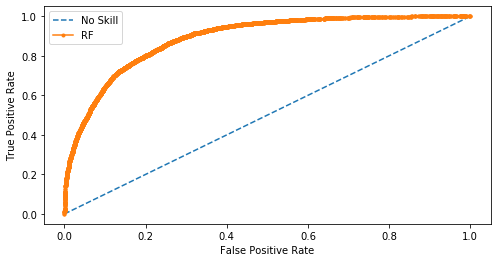

In [76]:
# ROC curve for RF model
ROC_AUC_curve(model=rf_model,model_name="RF")

#### Feature Importance plot for RF

In [78]:
# creating a new dataframe to store the features and their respective importance values
feature_imp = pd.DataFrame(rf_model.best_estimator_.feature_importances_, index=X_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp['features'] = feature_imp.index
feature_imp

,importance,features
casenumber,0.254337,casenumber
pw_soc_code,0.176068,pw_soc_code
pw_amount_9089,0.107932,pw_amount_9089
year,0.099412,year
employer_postal_code,0.061887,employer_postal_code
employer_name,0.048428,employer_name
employer_city,0.046293,employer_city
pw_soc_title,0.045736,pw_soc_title
pw_unit_of_pay_9089,0.043623,pw_unit_of_pay_9089
employer_state,0.035698,employer_state


#### Below feature importance plot shows that the top 5 features that are most helpful in predicting the visa application decisions for our dataset are:

1) casenumber

2) pw_soc_code

3) pw_amount_9089

4) year

5) employer_postal_code

Text(0, 0.5, 'FEATURE NAMES')

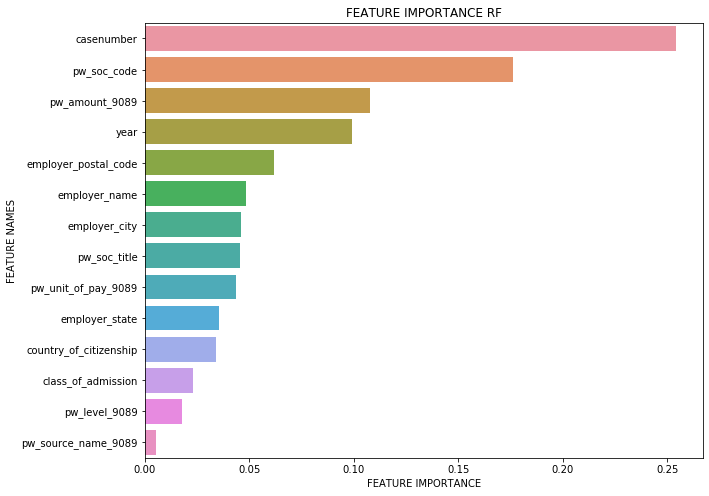

In [79]:
# Plotting Feature Importance graph
plt.figure(figsize=(10,8))

sns.barplot(x=feature_imp['importance'], y=feature_imp['features'])

plt.title('FEATURE IMPORTANCE RF')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

#### Saving the model using pickle library

In [80]:
# Save the trained model as a pickle string. 
saved_rf_model = pickle.dumps(rf_model) 
  
# Load the pickled model 
rf_from_pickle = pickle.loads(saved_rf_model) 

### Gradient Boosting Machine

- We have implemented the Gradient Boosting Machine Claasifier model here

- We have used a 3 folds cross validation grid search to perform the hyper parameter tuning 

- After this, we have printed the classification report for our model on training and testing data in order to get a sense of how well our model is performing in terms of precision, recall, f1-score and accuracy

- We have also generated an AUC-ROC curve for GBM model

In [217]:
# initializing the GBM model
gbm=GradientBoostingClassifier(random_state=16)

#### Hyper-paramater tuning using GridSearch:

- max_features: The max_features is the number of features that will be used for making a single tree. For eg using "sqrt", the tree uses the square root of the number of total features in the data. Using auto is the same as making use of sqrt. The other values can be specified using the int(number of features to be used less than the total features), log, and a proportion of the features to be used

- n_estimators:This is an important tuning parameter for the Gradient Boost model. It is the number of trees to be used for predicting the result

- subsample: The proportion of sample to be used for training individual base learner

- max_depth: This is the maximum depth till which the tree will keep on splitting. It ensures that the tree does not overfit the data

- min_samples_split: The number of samples that should be present in the node for it to be split further

- min_samples_leaf: The minimum number of samples that should be there in leaf node. If the number is less, then the leaf node is pruned

- n_jobs: This is a hyper-parameter used for the Grid search. n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer

In [218]:
# Performing grid search to find the best hyper-parameters
param_grid_gbm = {'max_features': ['auto','sqrt'],
              'n_estimators': [20,50,100,200],
              'subsample':[0.6,0.8,0.9],
              'max_depth': [1,5,20,10,50,100],
              'min_samples_split':[25,50,100,200],
              'min_samples_leaf':[10,30,50,100]}

In [221]:
# Using 3 fold cross validation and evaluation metric as Recall
grid_gbm= GridSearchCV(gbm, param_grid_gbm, cv=3, scoring='recall', n_jobs=-1, verbose=1)

In [222]:
# Fitting GBM model
gbm_model = grid_gbm.fit(X_train, y_train)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 48.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 100.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 143.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 210.5min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 303.7min
[Parallel(n_jobs=-1)]: Done 6912 out of 6912 | elapsed: 363.9min finished


In [223]:
# printing the best hyper-parameters
gbm_best_params = grid_gbm.best_params_
print(gbm_best_params)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 25, 'n_estimators': 20, 'subsample': 0.9}


In [224]:
# Printing classification report for predictions made by model on training dataset
print(classification_report(gbm_model.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85     15717
           1       0.91      0.83      0.87     19283

    accuracy                           0.86     35000
   macro avg       0.86      0.86      0.86     35000
weighted avg       0.86      0.86      0.86     35000



In [225]:
# Printing classification report for predictions made by model on validation dataset
print(classification_report(gbm_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      6806
           1       0.85      0.77      0.81      8194

    accuracy                           0.80     15000
   macro avg       0.80      0.80      0.80     15000
weighted avg       0.81      0.80      0.80     15000



#### Saving the model using pickle library

In [226]:
# Save the trained model as a pickle string. 
saved_gbm_model = pickle.dumps(gbm_model) 
  
# Load the pickled model 
gbm_from_pickle = pickle.loads(saved_gbm_model) 

#### Generating the AUC-ROC curve for the GBM model
- The AUC-ROC score that we get from the graph that we have plotted below tells us that our model is able to distinguish between the visa applications, if they will be certified or denied, 87.8% of the time

- The score is above 50% which means that the model is not just randomly predicting the probability of an application being certified or denied

No Skill: ROC AUC=0.500
Model: ROC AUC=0.878


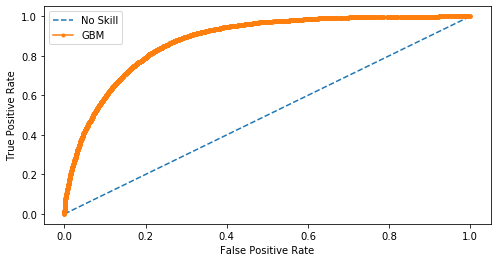

In [227]:
# printing AUC curve for GBM model
ROC_AUC_curve(model=gbm_model,model_name="GBM")

#### Feature Importance Plot for Gradient Boosting Machine Classifier

In [228]:
# creating a new dataframe to store the features and their respective importance values
feature_imp = pd.DataFrame(gbm_model.best_estimator_.feature_importances_, index=X_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp['features'] = feature_imp.index
feature_imp

,importance,features
casenumber,0.303305,casenumber
pw_soc_code,0.244863,pw_soc_code
year,0.096847,year
pw_amount_9089,0.072296,pw_amount_9089
pw_soc_title,0.059320,pw_soc_title
pw_unit_of_pay_9089,0.044764,pw_unit_of_pay_9089
employer_postal_code,0.040263,employer_postal_code
employer_city,0.036361,employer_city
employer_name,0.035969,employer_name
employer_state,0.020259,employer_state


#### Below feature importance plot shows that the top 5 features that are most helpful in predicting the visa application decisions for our dataset are:

1) casenumber

2) pw_soc_code

3) year

4) pw_amount_9089

5) pw_soc_title

Text(0, 0.5, 'FEATURE NAMES')

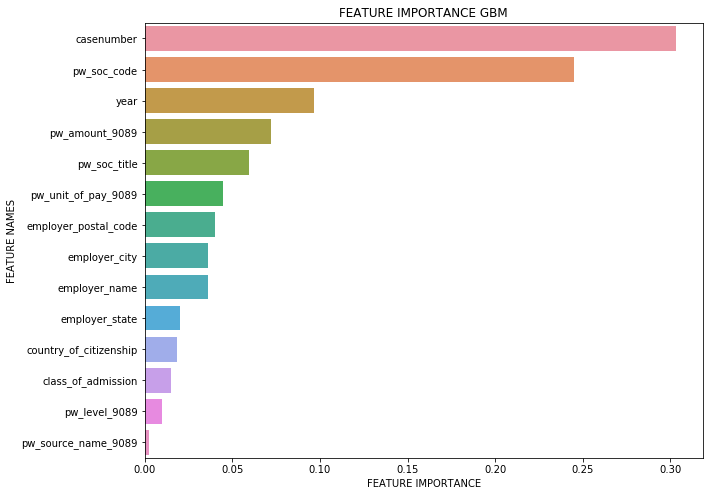

In [229]:
# Plotting Feature Importance graph
plt.figure(figsize=(10,8))

sns.barplot(x=feature_imp['importance'], y=feature_imp['features'])

plt.title('FEATURE IMPORTANCE GBM')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

### Linear SVM

- We have implemented the Linear Support Vector Machine model here

- We have used a 3 folds cross validation grid search to perform the hyper parameter tuning 

- After this, we have printed the classification report for our model on training and testing data in order to get a sense of how well our model is performing in terms of precision, recall, f1-score and accuracy

- We have not generated an AUC-ROC curve as SVM model does not predict the probability of the target class labels

In [202]:
# initializing the linear SVC model
lsvm = LinearSVC(random_state=16)

#### Hyper-paramater tuning using GridSearch:
- C: This is the cost parameter. It is used for regularization and represents the penalty associated with misclassification. Higher C means lower bias but risk of overfitting. It also means higher complexity of decision boundary and higher number of support vectors. Similarly, lower C means higher bias but lower variance
- penalty: This represents the penalty as l1 and l2 regularisation parameter. The l1 and l2 both penalize the points and make the models less susceptible to outliers and improve its overall generalization.
- loss: Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
- n_jobs: This is a hyper-parameter used for the Grid search. n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer

In [203]:
# Performing grid search to find the best hyper-parameters
param_grid_lsvm = { 'C':[.005,.01,.1,.2,.4,.8],
              'penalty':['l1', 'l2'],
              'loss': ['hinge', 'square_hinge']
              }

In [204]:
# Using 3 fold cross validation and evaluation metric as Recall
grid_lsvm = GridSearchCV(lsvm, param_grid_lsvm, cv=3, scoring='recall', n_jobs=-1)

In [205]:
# Fitting linear svc model
lsvm_model = grid_lsvm.fit(X_train, y_train)

In [206]:
# printing the best hyper-parameters
lsvm_best_params = grid_lsvm.best_params_
print(lsvm_best_params)

{'C': 0.005, 'loss': 'hinge', 'penalty': 'l2'}


In [207]:
# Printing classification report for predictions made by model on training dataset
print(classification_report(lsvm_model.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64     16009
           1       0.69      0.64      0.67     18991

    accuracy                           0.65     35000
   macro avg       0.65      0.65      0.65     35000
weighted avg       0.65      0.65      0.65     35000



In [208]:
# Printing classification report for predictions made by model on validation dataset
print(classification_report(lsvm_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.62      0.68      0.64      6860
           1       0.70      0.64      0.67      8140

    accuracy                           0.66     15000
   macro avg       0.66      0.66      0.66     15000
weighted avg       0.66      0.66      0.66     15000



### ANN 1 Hidden layer

- We have implemented the Artificial Neural Network model with 1 hidden layers here

- The ANN1 model contains an initial sequential layer followed by the dense hidden layer using activation function as 'relu' and 20 nodes followed by dense output layer that uses 'sigmoid' as the activation function in order to predict the binary labels for output class.

- The input shape is the total number of features present in the training data i.e. 14

- The hidden layer contains 20 nodes of perceptrons

- We have used the loss function as 'binary_crossentropy', optimizer as 'adam' and metrics as 'accuracy' to implement a deep learning network with 1 hidden layers

- We have used epochs=10 and batch_size=20 for the hyperparameter tuning of the model and have calculated the loss and accuracy for both train and testing data for each epoch

- After this, we have printed the classification report for our model on training data, validation data in order to get a sense of how well our model is performing in terms of precision, recall, f1-score and accuracy

- We have generated an AUC-ROC curve as ANN1 model that predicts the probability of the target class labels

In [75]:
# initializing the ANN1 model
ann1 = Sequential()
ann1.add(Dense(20, activation='relu', input_shape=(14,)))
ann1.add(Dense(1, activation='sigmoid', input_shape=(20,)))

#### Hyper-paramater tuning using GridSearch:
- activation: 'relu' or rectified linear activation function is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 'Relu' has been used for the hidden layer activation and 'sigmoid' function is used in the output layer as this is a binary classification problem
- loss: We have used the loss function here as the 'binary_crossentropy' which is a popular loss function for Neural Networks when we are trying to predict a binary output class
- optimizer: 'adam' optimizer has been used here. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments
- epochs: This parameter indicates the number of passes of the entire training dataset the neural network model has completed. We have used here 50 epochs to train our model
- batch_size: The batch size is fed to the model for a single update to the weights. The batch_size can be any of the below three:
                - Batch Gradient Descent. Batch Size = Size of Training Set
                - Stochastic Gradient Descent. Batch Size = 1
                - Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set
- Here we have used the mini batch size as 20

In [76]:
# compiling ANN1 model
ann1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
# fitting ANN1 model
ann1.fit(X_train, y_train, epochs=10, batch_size=20, verbose=1,validation_data=(X_test,y_test))

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 5s 147us/step - loss: 0.6339 - accuracy: 0.6377 - val_loss: 0.6144 - val_accuracy: 0.6621
Epoch 2/10
35000/35000 [==============================] - 5s 133us/step - loss: 0.6138 - accuracy: 0.6586 - val_loss: 0.6076 - val_accuracy: 0.6698
Epoch 3/10
35000/35000 [==============================] - 5s 138us/step - loss: 0.6081 - accuracy: 0.6654 - val_loss: 0.6033 - val_accuracy: 0.6733
Epoch 4/10
35000/35000 [==============================] - 5s 145us/step - loss: 0.6040 - accuracy: 0.6671 - val_loss: 0.6007 - val_accuracy: 0.6759
Epoch 5/10
35000/35000 [==============================] - 5s 135us/step - loss: 0.6009 - accuracy: 0.6704 - val_loss: 0.5984 - val_accuracy: 0.6787
Epoch 6/10
35000/35000 [==============================] - 5s 132us/step - loss: 0.5985 - accuracy: 0.6736 - val_loss: 0.5959 - val_accuracy: 0.6809
Epoch 7/10
35000/35000 [==============================] - 5s 1

In [78]:
# Printing classification report for predictions made by model on training dataset
print(classification_report(y_true=y_train,y_pred=(ann1.predict(X_train)>0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68     17460
           1       0.68      0.70      0.69     17540

    accuracy                           0.68     35000
   macro avg       0.68      0.68      0.68     35000
weighted avg       0.68      0.68      0.68     35000



In [79]:
# Printing classification report for predictions made by model on validation dataset
print(classification_report(y_true=y_test,y_pred=(ann1.predict(X_test)>0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      7540
           1       0.68      0.70      0.69      7460

    accuracy                           0.68     15000
   macro avg       0.68      0.68      0.68     15000
weighted avg       0.68      0.68      0.68     15000



#### Generating the AUC-ROC curve for the ANN model

- The AUC-ROC score that we get from the graph that we have plotted below tells us that our model is able to distinguish between the visa applications, if they will be certified or denied, 75.2% of the time

- The score is above 50% which means that the model is not just randomly predicting the probability of an application being certified or denied

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.752


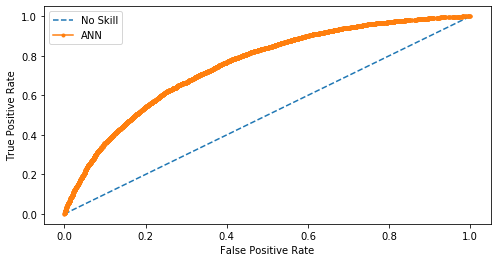

In [81]:
# plot AUC curve 
ROC_AUC_curve_upgraded(model=ann1,model_name="ANN")

## Conclusion

- To conclude, we can say that through this research work, we have developed a system that can effectively predict binary outcomes of permanent visa applications

- Random Forest and Gradient Boosting Classifiers work really well with the visa dataset and should be the focus of further improvements as more data is gathered

- pw_soc_code (occupational code associated with the job), pw_amount_9089 (income associated with the job), employer_postal_code (major cities may have higher acceptance rate) are some of the major attributes helpful in predicting the visa application decisions

In [3]:
# Creating a summary table for the model names, their recall, auc, accuracy scores and their best hyper parameters
best_models = pd.DataFrame({"Algorithm":["LR","RF","GBM","LSVM","ANN"], "Recall":[64,78,77,64,70],
                            "AUC":[71.3,88.8,87.8,'-',75.2], 'Accuracy':[66,80,80,66,68],
                            'Precision':[70,84,85,70,68],
                            'F1-Score':[67,81,81,67,69],
                            "Best Hyper-parameters":["C:0.005,penalty:l1",
                                                     "max_depth:100,max_features:auto,min_samples_leaf:10,min_samples_split:10,n_estimators:200",
                                                     "max_depth:10,max_features:auto,min_samples_leaf:10,min_samples_split:25,n_estimators:20,subsample:0.9",
                                                     "C:0.005,loss:hinge,penalty:l2",
                                               "epochs:10,batch_size:20,loss_function:binary_crossentrpy,optimizer:adam",
                                               ]})

In [4]:
# Printing the best_models summary table sorted by F1-scores
best_models.sort_values(by="F1-Score",ascending=False)

,Algorithm,Recall,AUC,Accuracy,Precision,F1-Score,Best Hyper-parameters
1,RF,78,88.8,80,84,81,"max_depth:100,max_features:auto,min_samples_le..."
2,GBM,77,87.8,80,85,81,"max_depth:10,max_features:auto,min_samples_lea..."
4,ANN,70,75.2,68,68,69,"epochs:10,batch_size:20,loss_function:binary_c..."
0,LR,64,71.3,66,70,67,"C:0.005,penalty:l1"
3,LSVM,64,-,66,70,67,"C:0.005,loss:hinge,penalty:l2"
